In [22]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Daily
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [23]:
start = datetime(2022, 1, 1)
end = datetime(2023, 12, 12)

In [24]:
data = Daily('10637', start, end)
data = data.fetch()

In [25]:
df = pd.DataFrame(data)
df.to_csv("2022data.csv")
print(data)


            tavg  tmin  tmax  prcp  snow   wdir  wspd  wpgt    pres   tsun
time                                                                      
2022-01-01   9.7   3.8  12.0   0.0   0.0  192.0   8.6  26.6  1027.1    0.0
2022-01-02   8.1   3.2  12.0   5.1   0.0  221.0  15.8  62.3  1019.3   96.0
2022-01-03   9.8   7.7  12.1  13.6   0.0  230.0  22.3  47.9  1014.3    9.0
2022-01-04   7.4   5.8   9.9  19.3   0.0  209.0  16.2  51.5  1000.4    0.0
2022-01-05   3.9   1.8   6.1   0.0   0.0  241.0  23.4  54.4  1008.4  126.0
...          ...   ...   ...   ...   ...    ...   ...   ...     ...    ...
2023-02-20   3.8   0.3   7.7   NaN   NaN  136.0   8.7  24.1  1029.9    NaN
2023-02-21   4.2   0.8   7.6   NaN   NaN  172.0   9.5  22.2  1027.7    NaN
2023-02-22   5.3   2.9   8.4   NaN   NaN  202.0  11.0  27.8  1023.5    NaN
2023-02-23   5.0   3.5   7.3   NaN   NaN  236.0  12.6  29.6  1020.6    NaN
2023-02-24   4.3   2.4   6.9   NaN   NaN  252.0  11.8  27.8  1018.3    NaN

[420 rows x 10 columns]


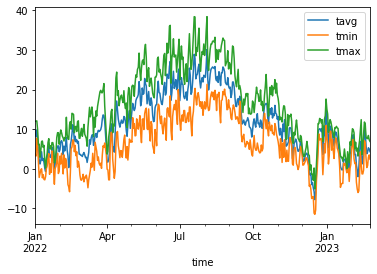

In [26]:
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

In [27]:
train_data = data.sample(frac=0.8, random_state=1)
test_data = data.drop(train_data.index)

In [28]:
X_train = train_data[['tavg', 'tmin', 'tmax']]
y_train = train_data['wspd']
X_test = test_data[['tavg', 'tmin', 'tmax']]
y_test = test_data['wspd']



In [29]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [30]:


# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 27.07945414687906


In [31]:
import pickle
pickle.dump(model, open('lr_model.pkl','wb'))